<a href="https://colab.research.google.com/github/DaiRodri/IA/blob/main/reconhecimentofacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install tensorflow opencv-python dlib numpy matplotlib


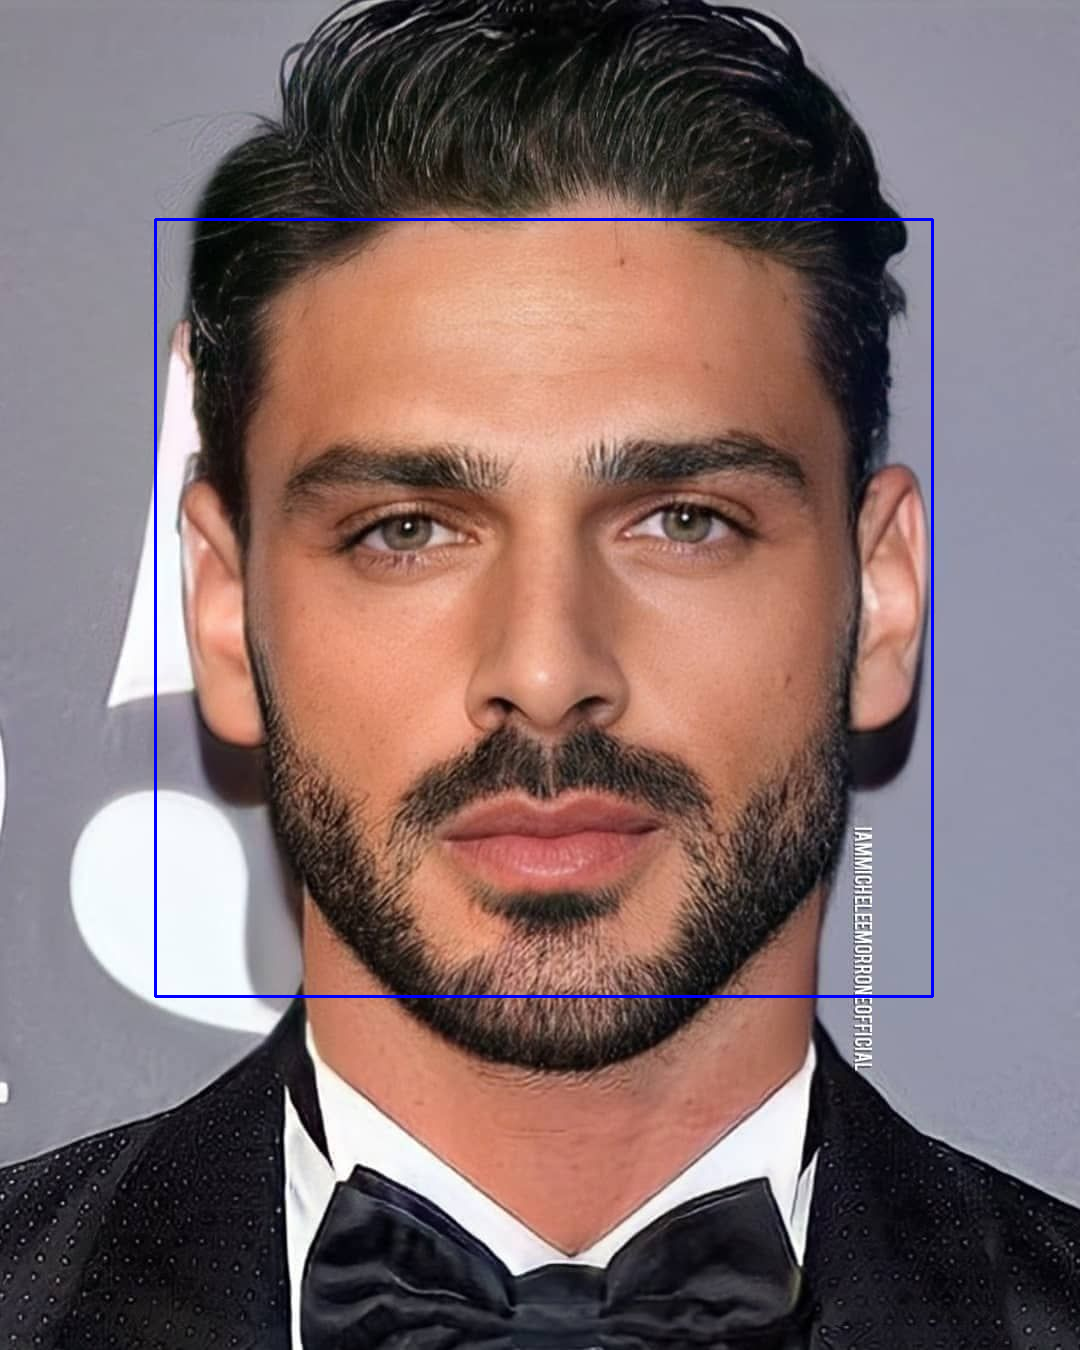

In [34]:
import cv2

# Carregar o classificador Haar Cascade para detectar faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carregar a imagem
img = cv2.imread('sua_imagem.jpg')

# Converter para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Desenhar retângulos ao redor das faces detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

from google.colab.patches import cv2_imshow  # Importar a função correta

# Mostrar a imagem com as faces detectadas
cv2_imshow(img)
cv2.waitKey(0)  # Espera por uma tecla ser pressionada
cv2.destroyAllWindows()  # Fecha qualquer janela de imagem, se necessário



In [35]:
pip install keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Embedding: [[1.38698131e-04 2.81043496e-04 4.41511002e-05 9.23198968e-05
  3.61998609e-05 3.96348652e-04 5.72869885e-06 2.75576094e-05
  1.26359146e-05 1.09792258e-04 7.85697484e-04 1.24644459e-04
  5.04331765e-05 7.13456539e-05 1.27283774e-05 3.92643087e-05
  1.22004720e-04 2.38304128e-05 4.79990522e-05 4.65775011e-05
  1.61081553e-04 1.54526997e-03 7.81822659e-04 1.83967568e-04
  7.37944138e-05 9.04447734e-05 3.09618626e-04 2.00746174e-04
  1.42325909e-04 1.68976389e-04 3.13034616e-05 2.77868210e-04
  6.83445833e-05 9.40659447e-05 1.99095724e-04 1.24461958e-05
  1.09540051e-04 7.81824929e-06 5.20809041e-03 2.79931519e-05
  3.93752307e-05 1.82753924e-04 2.42676892e-04 1.78937611e-04
  4.94545748e-05 1.08318192e-04 3.60783342e-05 2.01784947e-04
  2.78267980e-05 3.03381275e-05 1.34220492e-04 3.87877953e-04
  2.23828974e-04 4.54053195e-04 2.42633032e-04 1.85395074e-05
  5.12071383e-05 1.32125042e-05 1.05079904e-04 3.04342876e-03
  3.72848910e-04 3.2311

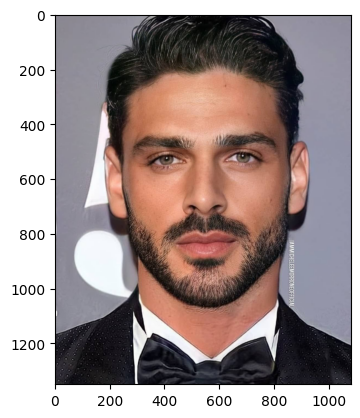

In [36]:
from tensorflow.keras.applications import ResNet50  # Importa o modelo ResNet50
from tensorflow.keras.preprocessing import image  # Para carregar e processar imagens
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions  # Funções auxiliares do ResNet50
import tensorflow as tf  # TensorFlow para manipulação do modelo
import numpy as np  # Biblioteca para manipulação de arrays
import cv2  # OpenCV para manipulação de imagens
from matplotlib import pyplot as plt  # Para exibir imagens

# Carregar o modelo pré-treinado ResNet50 (você estava usando o FaceNet anteriormente)
model = ResNet50(weights='imagenet')  # Carregar o modelo ResNet50 com pesos treinados no ImageNet

# Função para processar e normalizar a imagem
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))  # Redimensiona a imagem para 224x224 (tamanho esperado pela ResNet50)
    image = np.expand_dims(image, axis=0)  # Expande a dimensão para que a imagem tenha a forma (1, 224, 224, 3)
    image = image / 255.0  # Normaliza a imagem
    return image

# Carregar uma imagem e aplicar a detecção de face (use OpenCV ou MTCNN aqui)
image = cv2.imread('sua_imagem.jpg')  # Caminho da imagem
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Converte a imagem para escala de cinza

# Aqui você precisa ter um classificador HaarCascade previamente carregado
# Certifique-se de carregar um classificador de face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)  # Detecta as faces

# Para cada face detectada
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]  # Recorta a face da imagem

    # Pré-processamento da face
    face_input = preprocess_image(face)

    # Obter o embedding da face
    embedding = model.predict(face_input)

    # Exibe o embedding
    print("Embedding:", embedding)  # Exibe o vetor de características

    # Exibe a imagem com a face detectada
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [37]:
from scipy.spatial.distance import cosine

def compare_embeddings(embedding1, embedding2):
    # Comparar dois embeddings usando distância do cosseno
    return cosine(embedding1, embedding2)
